# lab 6, El problema del VIAJANTE DEL COMERCIO
problema NP-HARD, Es un problema dificil de resolver, el numero de combinaciones posibles depende de la cantidad de ciudades, las combinaciones posibles son de (m - 1)! si queremos resolver por fuerza bruta, es decir probando todas los resultados posibles.
m = a la cantidad de las ciudades

## IMPORTANDO CSV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
from dataclasses import dataclass
import math
import pandas as pd
import random
import csv
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive/


## Clase Ciudad

In [ ]:
@dataclass(eq=True, frozen=True)
class City:
  # def __init__(self, name, x, y):
  #     self.name = name
  #     self.x = x
  #     self.y = y
  name: str
  x: int
  y: int
  
  def distancia(self, other_city): # obtiene la distancia de una cuidad a otra
    xx = other_city.x - self.x
    yy = other_city.y - self.y
    return math.sqrt(xx**2 + yy**2)
  



## Clase Ruta
almacena una lista de la rutas de ciudades (poblacion)

In [ ]:
# ciudades = pd.read_csv('/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/LABORATORIO/paises.csv')
# contiene una lista de ciudades
class Ruta: # diferentes rutas que se podria tener (cromosoma)
  def __init__(self, ciudades): # recibe un conjonde de ciudades
    self.ciudades = ciudades
    self.distancia = sum(
        a.distancia(b) for a, b in zip(self.ciudades[1:], self.ciudades[:-1])
    )
    # self.distancia = 0
    # for i in range(len(ciudades)-1):
    #   self.distancia += self.ciudades[i].distacia(self.ciudades[i+1])

## Utils

In [ ]:

def generate_cities(city_count: int, minx: int, miny: int, maxx: int, maxy: int):
    cities = set() # set() crea un objeto de conjunto
    # ciudades = pd.read_csv('/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/LABORATORIO/paises.csv')
    with open("/content/gdrive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/LABORATORIO/paises.csv", encoding="utf8") as readable:
        reader = csv.reader(readable)
        # cont = 0
        for raw_city in reader:
            x = random.randint(minx, maxx)
            y = random.randint(miny, maxy)
            cities.add(City(name=raw_city[0], x=x, y=y))
            # print('CITIES:',cont,' ',cities)
            # cont += 1
    return set(random.sample(cities, city_count))


def generar_poblacion(ciudades, n_ciudades): # La funcion genera la poblacion a partir de las ciudades generas, es decir las diferentes rutas que existen
  poblacion = []
  for i in range(n_ciudades):
    poblacion_generada = random.sample(ciudades, len(ciudades))
    ruta = Ruta(poblacion_generada)
    poblacion.append(ruta)
  return poblacion
  

def selecciona_padres(poblacion, n_padres): # selecciona los primeros n_padres = 100 de la poblacion
  ordenados_por_distancia = sorted(poblacion, key=lambda ruta: ruta.distancia)
  seleccionados = ordenados_por_distancia[:n_padres]
  return seleccionados 


def _cruza_dos_padres(padre1, padre2): 
  hijo = deepcopy(padre2)
  elementos = 3
  for posicion_p1, valor_p1 in enumerate(padre1):
    posicion_2 = hijo.index(valor_p1) # devuelve el primer elemento encontrado
    hijo[posicion_2] = hijo[posicion_p1]
    hijo[posicion_p1] = valor_p1
  return hijo


def reproduccion(mejores_padres, nuevo_tamano_poblacion): # se crusan dos padres elegidos de los mejores padres elegidos  
  hijos_faltantes = nuevo_tamano_poblacion - len(mejores_padres)
  nuevos_hijos = []
  for i in range(hijos_faltantes):
    padre1, padre2 = random.sample(mejores_padres, 2)
    # padre1, padre2 = mejores_padres[i], mejores_padres[i+1]
    nuevo_hijo = Ruta(_cruza_dos_padres(padre1.ciudades, padre2.ciudades))
    nuevos_hijos.append(nuevo_hijo)
  return nuevos_hijos


def mutacion(nuevos_hijos, probavilidad_mutacion): # la mutacion consiste en cambiar una ciudad por otra
  hijos_mutados = []
  for hijo in nuevos_hijos:
    ciudades = deepcopy(hijo.ciudades)
    if probavilidad_mutacion > random.random():
      cambiar_de = random.randint(0, len(ciudades)-1)
      cambiar_a = random.randint(0, len(ciudades)-1)
      while cambiar_de == cambiar_a: # para que no se eligan las mismas ciudades
        cambiar_a = random.randint(0, len(ciudades)-1)
      ciudad_a_cambiar  = ciudades[cambiar_a]
      ciudades[cambiar_a] = ciudades[cambiar_de]
      ciudades[cambiar_de] = ciudad_a_cambiar
  hijos_mutados.append(Ruta(ciudades))
  return hijos_mutados


  ##FUNCIONES PARA GRAFCAR 
def datos_graficar(poblacion):
  city, x, y, = [], [], []
  for i in range(numero_ciudades):
    city.append(poblacion[0].ciudades[i].name)
    x.append(poblacion[0].ciudades[i].x)
    y.append(poblacion[0].ciudades[i].y)
  return city, x, y

def graficar(city, x, y):
  plt.figure(figsize=(15,8))
  plt.scatter(x,y,s=10,color="red")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Mapa de las Ciudades",fontsize=15)
  for i, label in enumerate(city):
    plt.annotate(label, (x[i], y[i]))

  plt.show()
  return 0

def graficar_caminos(city, x, y):
  plt.figure(figsize=(15,8))
  plt.scatter(x,y,s=10,color="red")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Mapa de las Rutas",fontsize=15)
  for i in range(len(x)):
    plt.text(x[i], y[i], city[i])
  xpoints = np.array(x)
  ypoints = np.array(y)
  plt.plot(xpoints, ypoints)
  plt.show()
  return 0

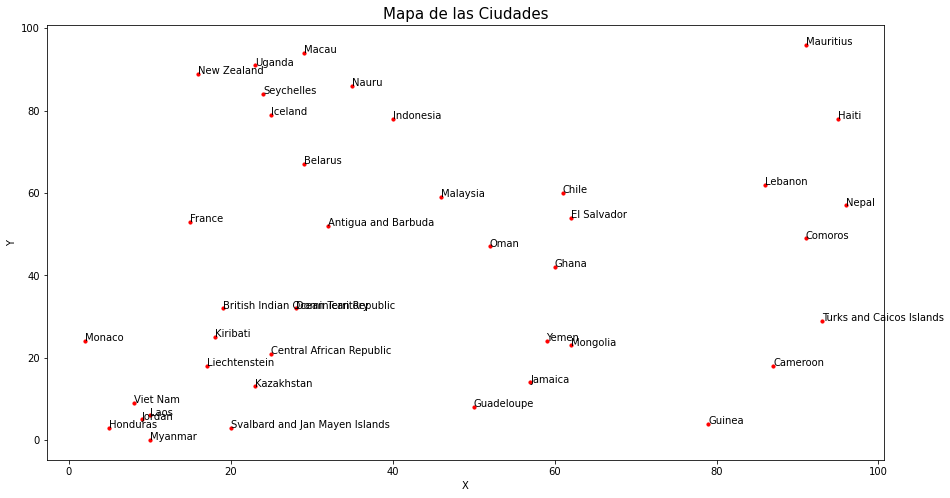

Generacion: 1,   Fitnes: 1603.0983737957129 
Generacion: 2,   Fitnes: 1603.0983737957129 
Generacion: 3,   Fitnes: 1603.0983737957129 
Generacion: 4,   Fitnes: 1603.0983737957129 
Generacion: 5,   Fitnes: 1603.0983737957129 
Generacion: 6,   Fitnes: 1603.0983737957129 
Generacion: 7,   Fitnes: 1603.0983737957129 
Generacion: 8,   Fitnes: 1603.0983737957129 
Generacion: 9,   Fitnes: 1603.0983737957129 
Generacion: 10,   Fitnes: 1603.0983737957129 
Generacion: 11,   Fitnes: 1603.0983737957129 
Generacion: 12,   Fitnes: 1603.0983737957129 
Generacion: 13,   Fitnes: 1603.0983737957129 
Generacion: 14,   Fitnes: 1603.0983737957129 
Generacion: 15,   Fitnes: 1603.0983737957129 
Generacion: 16,   Fitnes: 1603.0983737957129 
Generacion: 17,   Fitnes: 1603.0983737957129 
Generacion: 18,   Fitnes: 1603.0983737957129 
Generacion: 19,   Fitnes: 1603.0983737957129 
Generacion: 20,   Fitnes: 1603.0983737957129 
Generacion: 21,   Fitnes: 1603.0983737957129 
Generacion: 22,   Fitnes: 1603.098373795712

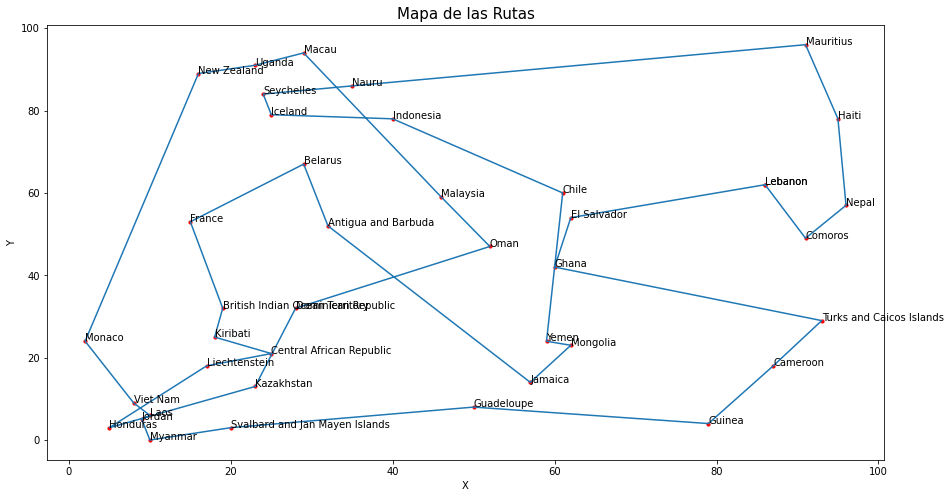

In [ ]:
if __name__ == "__main__":
  numero_ciudades = 40 # cantidad de ciudades
  # minimo y maximo de 'x & y' para generar las coordenas en x y y aleatoriamente entre ese rango
  min_x = 0
  min_y = 0
  max_x = 100
  max_y = 100 
  numero_poblacion = 100 #cantidad de la poblacion
  n_padres_seleccionados = int(numero_poblacion/3) # seleccion padres para la mescla
  probavilidad_mutacion = 0.6 # probavlidad para la mutacion
  # cantidad_cruce = 0,5  # cuantos padres pueden hacer el cruce del total de la poblacion
  numero_generaciones = 5000

  #CREACION DE LAS CIUDADES Y LA POBLACION
  ciudades_generados = generate_cities(numero_ciudades, min_x, min_y, max_x, max_y)

  poblacion = generar_poblacion(ciudades_generados, numero_poblacion)
  # print('poblacion seleccionada: ',poblacion[0])

  city, x, y = datos_graficar(poblacion) # extraccion de datos para graficar
  graficar(city, x, y)
  
  mejor_ruta_repetido = 0
  contador = 0
  for id_generacion in range(numero_generaciones):
    mejor_ruta = sorted(poblacion, key=lambda ruta: ruta.distancia)[0]
    if contador == 500: # Si un mismo fitnes se repite 500 veces se corta la ejecicucion
      break
    else: 
      if mejor_ruta_repetido == mejor_ruta.distancia:
        contador += 1
      else:
        contador = 0

    mejor_ruta_repetido = mejor_ruta.distancia

    print(f'Generacion: {id_generacion+1},   Fitnes: {mejor_ruta.distancia} ')
    #SELECCION  LOS MEJORES PADRES
    seleccion_padres = selecciona_padres(poblacion, n_padres_seleccionados)
    #REPRODUCCION O CRUCE
    hijos_cruzados  = reproduccion(seleccion_padres, numero_poblacion)
    #MUTACION
    hijos_mutados = mutacion(hijos_cruzados, probavilidad_mutacion)
    #CREA NUEVA POBLACION
    poblacion  = seleccion_padres + hijos_mutados


  # PARA GRAFICAR
  city, x, y = datos_graficar(poblacion) # extraccion de datos para graficar
  x.append(x[0])
  y.append(y[0])
  city.append(city[0])
  graficar_caminos(city, x, y) # grafica la solucion